# Gray Scale Data

In [1]:
import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os,sys

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f'Num GPUs available: {len(physical_devices)}')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available: 1


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [ ]:
model = keras.Sequential([
              keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',name ='conv0', input_shape=(28,28,1)),
              keras.layers.MaxPool2D(pool_size=(2,2),strides=2, name='max_pool0'),
              keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',name ='conv1'),
              keras.layers.MaxPool2D(pool_size=(2,2),strides=2, name='max_pool1'),
              keras.layers.Flatten(),
              keras.layers.Dense(units=128,activation='relu'),
              keras.layers.Dense(units=10, activation='softmax')
],name='FashinModel')

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "FashinModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 max_pool0 (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 conv1 (Conv2D)              (None, 14, 14, 64)        18496     
                                                                 
 max_pool1 (MaxPooling2D)    (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               401536    
                                                                 
 dense_3 (Dense)             (None, 10)                

In [ ]:
callbacks = [EarlyStopping(patience=5, monitor="val_accuracy")]

In [ ]:
history = model.fit(X_train_norm,y_train,epochs=20,batch_size=128,shuffle=True,validation_data=(X_test_norm, y_test),callbacks=callbacks)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4899 - accuracy: 0.8228 - val_loss: 0.3619 - val_accuracy: 0.8702
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3100 - accuracy: 0.8885 - val_loss: 0.3123 - val_accuracy: 0.8876
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2635 - accuracy: 0.9055 - val_loss: 0.2819 - val_accuracy: 0.8978
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2347 - accuracy: 0.9147 - val_loss: 0.2672 - val_accuracy: 0.9023
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2113 - accuracy: 0.9220 - val_loss: 0.2463 - val_accuracy: 0.9102
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1922 - accuracy: 0.9288 - val_loss: 0.2386 - val_accuracy: 0.9132
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1744 - accuracy: 0.9364 - val_loss: 0.2404 - val_accuracy: 0.9129
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(X_test_norm,y_test)
print(f'Acc. on test dataset:{test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2963 - accuracy: 0.9151
Acc. on test dataset:0.9150999784469604


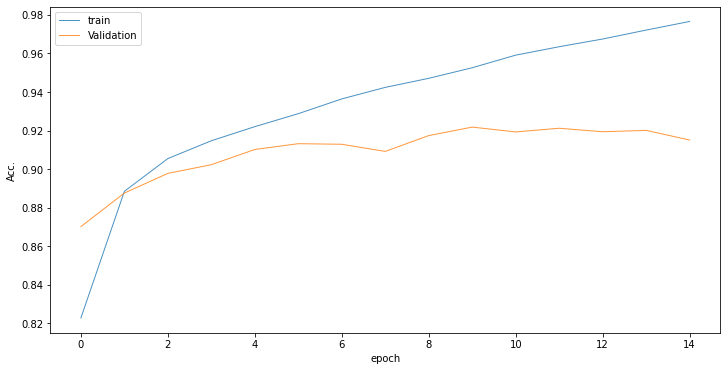

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(history.history["accuracy"], linewidth=1, alpha=0.8, label="train")
plt.plot(history.history["val_accuracy"], linewidth=1, alpha=0.8, label="Validation")
plt.xlabel("epoch")
plt.ylabel("Acc.")
plt.legend()

In [ ]:
labels = {'0':'T-shirt/top', '1':'Trouser','2':'Pullover','3':'Dress','4':'Coat','5':'Sandal','6':'Shirt','7':'Sneaker','8':'Bag','9':'Ankle boot'}

In [ ]:
np.argmax(model.predict(X_test_norm[0:1,:]))

9

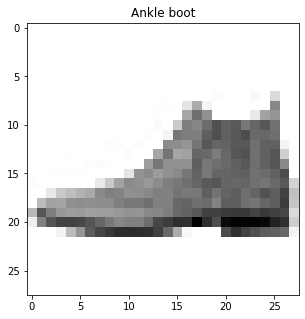

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_test_norm[0,:,:],cmap=plt.cm.binary)
plt.title(labels[str(9)])
plt.show()

# Colored images

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
def list_files_with_absolute_paths(dirpath: str, endswith: str = None):
    if endswith is None:
        files = []
        for dirname, dirnames, filenames in os.walk(dirpath):
            files += [os.path.join(dirname, filename) for filename in filenames]
    else:
        files = []
        for dirname, dirnames, filenames in os.walk(dirpath):
            files += [
                os.path.join(dirname, filename)
                for filename in filenames
                if filename.endswith(endswith)
            ]
    return files

# Prepration trainig data

In [9]:
BATCH_SIZE = 128
IMG_SHAPE  = 150

In [10]:
list_tr_imgs = list_files_with_absolute_paths(train_dir, endswith='.jpg')

In [11]:
img_tr_path = []
img_tr_label = []

for i in list_tr_imgs:
  img_tr_path.append(i)
  img_tr_label.append(i.split('/')[-1].split('.')[0])

In [12]:
df_tr_imgs = pd.DataFrame({'img_tr_path':img_tr_path, 'img_tr_label':img_tr_label}, columns=['img_tr_path', 'img_tr_label']).sample(frac=1)

In [13]:
img_tr_list = []
for i in df_tr_imgs['img_tr_path']:
  img = cv2.imread(i,cv2.IMREAD_COLOR)[...,::-1]
  img_tr_list.append(cv2.resize(img,(IMG_SHAPE,IMG_SHAPE),interpolation=cv2.INTER_CUBIC))

In [ ]:
X_train = np.array(img_tr_list)
y_train = df_tr_imgs.img_tr_label.values

In [ ]:
list_val_imgs = list_files_with_absolute_paths(validation_dir, endswith='.jpg')

In [ ]:
img_val_path = []
img_val_label = []
img_val_list = []

for i in list_val_imgs:
  img_val_path.append(i)
  img_val_label.append(i.split('/')[-1].split('.')[0])
  img = cv2.imread(i,cv2.IMREAD_COLOR)[...,::-1]
  img_val_list.append(cv2.resize(img,(IMG_SHAPE,IMG_SHAPE),interpolation=cv2.INTER_CUBIC))

In [ ]:
X_test = np.array(img_val_list)
y_test = np.array(img_val_label)

In [ ]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

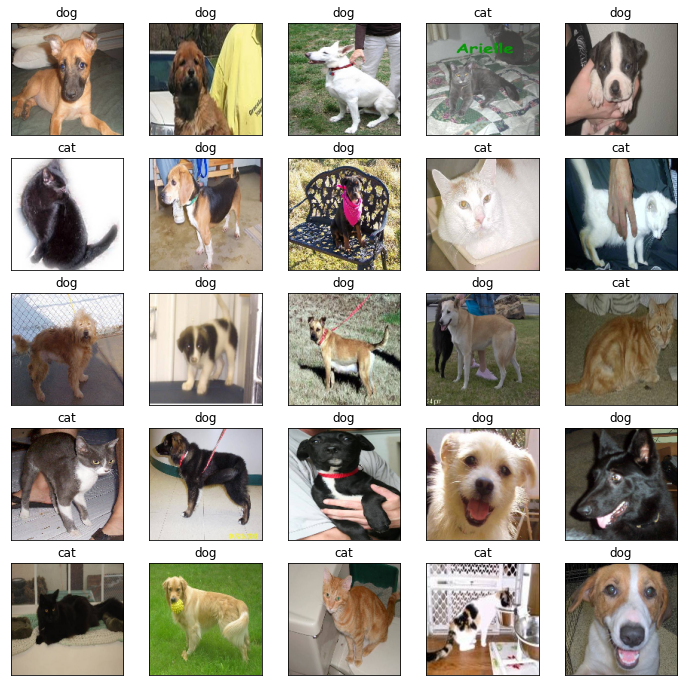

In [ ]:
plt.figure(figsize=(12,12))
for i, (image,code) in enumerate(zip(X_train,df_tr_imgs.img_tr_label)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image)
  plt.title(code)
  if i==24:
    break


In [ ]:
model = keras.Sequential([
          keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(150, 150, 3), name='Conv1'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling1'),

          keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', name='Conv2'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling2'),

          keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', name='Conv3'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling3'),

          keras.layers.Flatten(name='Flatten'),
          keras.layers.Dense(512,activation='relu', name='Dense1'),
          keras.layers.Dense(1,activation='sigmoid', name='Dense2')],
          name='CatDogModel'
          )

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "CatDogModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 Pooling1 (MaxPooling2D)     (None, 74, 74, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 Pooling2 (MaxPooling2D)     (None, 36, 36, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 34, 34, 128)       73856     
                                                                 
 Pooling3 (MaxPooling2D)     (None, 17, 17, 128)       0         
                                                                 
 Flatten (Flatten)           (None, 36992)             

In [ ]:
callbacks = [EarlyStopping(patience=10, monitor="val_accuracy")]

In [ ]:
history = model.fit(X_train_norm,y_train,epochs=100,batch_size=BATCH_SIZE,shuffle=True,validation_data=(X_test_norm, y_test),callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - 4s 224ms/step - loss: 0.9602 - accuracy: 0.5110 - val_loss: 0.6832 - val_accuracy: 0.5830
Epoch 2/100
16/16 [==============================] - 3s 191ms/step - loss: 0.6703 - accuracy: 0.5880 - val_loss: 0.6370 - val_accuracy: 0.6200
Epoch 3/100
16/16 [==============================] - 3s 191ms/step - loss: 0.6169 - accuracy: 0.6475 - val_loss: 0.6382 - val_accuracy: 0.6330
Epoch 4/100
16/16 [==============================] - 3s 192ms/step - loss: 0.5958 - accuracy: 0.6905 - val_loss: 0.6110 - val_accuracy: 0.6630
Epoch 5/100
16/16 [==============================] - 3s 192ms/step - loss: 0.5388 - accuracy: 0.7395 - val_loss: 0.5966 - val_accuracy: 0.6850
Epoch 6/100
16/16 [==============================] - 3s 193ms/step - loss: 0.4956 - accuracy: 0.7635 - val_loss: 0.6064 - val_accuracy: 0.6740
Epoch 7/100
16/16 [==============================] - 3s 191ms/step - loss: 0.4439 - accuracy: 0.7980 - val_loss: 0.5923 - val_accuracy: 0.6910

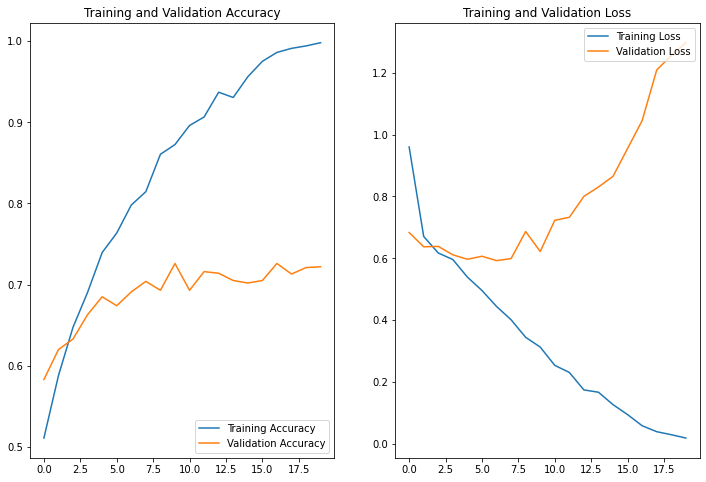

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.savefig('./foo.png')
plt.show()

In [ ]:
int(model.predict(X_train[500:501,:])>0.5)

0

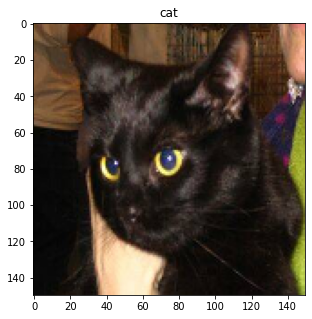

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_test_norm[500,:,:],cmap=plt.cm.binary)
plt.title(list(le.classes_)[0])
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg
Saving dog.jpg to dog.jpg


In [ ]:
img = cv2.imread('cat.jpg')[...,::-1]

In [ ]:
img1 = cv2.resize(img,(150,150))/255.0

In [ ]:
img1 = img1.reshape(1,150,150,3)

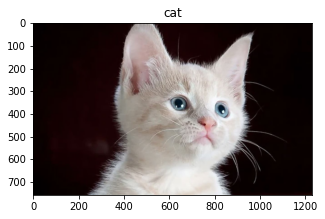

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img,cmap=plt.cm.binary)
plt.title(list(le.classes_)[int(model.predict(img1)>0.5)])
plt.show()

In [ ]:
model.predict(img1)

array([[0.14640436]], dtype=float32)

# CNN with image augmentation

In [26]:
BATCH_SIZE=128

In [98]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [99]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [100]:
!ls /root/.keras/datasets/cats_and_dogs_filtered

train  validation  vectorize.py


In [101]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=45,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
            rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        shuffle=True,
        target_size =(150,150),
        batch_size=BATCH_SIZE,
        class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        shuffle=True,
        target_size =(150,150),
        batch_size=BATCH_SIZE,
        class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [102]:
model = keras.Sequential([
          keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(150, 150, 3), name='Conv1'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling1'),

          keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', name='Conv2'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling2'),

          keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', name='Conv3'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling3'),

          keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', name='Conv4'),
          keras.layers.MaxPool2D(pool_size=(2, 2), name='Pooling4'),

          tf.keras.layers.Dropout(0.5, name='Dropout1'),
          keras.layers.Flatten(name='Flatten'),
          keras.layers.Dense(512,activation='relu', name='Dense1'),
          keras.layers.Dense(1,activation='sigmoid', name='Dense2')],
          name='CatDogModelAugmentation'
          )

In [103]:
model.summary()

Model: "CatDogModelAugmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 Pooling1 (MaxPooling2D)     (None, 74, 74, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 Pooling2 (MaxPooling2D)     (None, 36, 36, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 34, 34, 128)       73856     
                                                                 
 Pooling3 (MaxPooling2D)     (None, 17, 17, 128)       0         
                                                                 
 Conv4 (Conv2D)              (None, 15, 15,

In [104]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [105]:
filepath="./weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [EarlyStopping(patience=10, monitor="val_accuracy"),checkpoint]

In [108]:
history = model.fit(train_generator,epochs=100,
                    steps_per_epoch=int(np.ceil(2000 / float(BATCH_SIZE))),
                    shuffle=True,
                    validation_data=validation_generator,
                    validation_steps=int(np.ceil(1000 / float(BATCH_SIZE))),
                    callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.4965
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to ./weights-improvement-01-0.50.hdf5
16/16 [==============================] - 27s 2s/step - loss: 0.7134 - accuracy: 0.4965 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5165
Epoch 00002: val_accuracy improved from 0.50000 to 0.52500, saving model to ./weights-improvement-02-0.52.hdf5
16/16 [==============================] - 25s 2s/step - loss: 0.6920 - accuracy: 0.5165 - val_loss: 0.6894 - val_accuracy: 0.5250
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5350
Epoch 00003: val_accuracy did not improve from 0.52500
16/16 [==============================] - 24s 2s/step - loss: 0.6912 - accuracy: 0.5350 - val_loss: 0.6857 - val_accuracy: 0.5070
Epoch 4/100
16/16 [==============================] - E

In [110]:
!ls

sample_data			  weights-improvement-25-0.71.hdf5
weights-improvement-01-0.50.hdf5  weights-improvement-26-0.72.hdf5
weights-improvement-02-0.52.hdf5  weights-improvement-28-0.74.hdf5
weights-improvement-04-0.53.hdf5  weights-improvement-29-0.75.hdf5
weights-improvement-05-0.57.hdf5  weights-improvement-38-0.75.hdf5
weights-improvement-06-0.62.hdf5  weights-improvement-48-0.76.hdf5
weights-improvement-07-0.65.hdf5  weights-improvement-54-0.77.hdf5
weights-improvement-11-0.67.hdf5  weights-improvement-55-0.77.hdf5
weights-improvement-13-0.68.hdf5  weights-improvement-56-0.78.hdf5
weights-improvement-15-0.68.hdf5  weights-improvement-60-0.78.hdf5
weights-improvement-18-0.70.hdf5  weights-improvement-70-0.79.hdf5
weights-improvement-20-0.70.hdf5  weights-improvement-74-0.80.hdf5
weights-improvement-21-0.70.hdf5  weights-improvement-84-0.80.hdf5
weights-improvement-23-0.70.hdf5  weights-improvement-94-0.81.hdf5


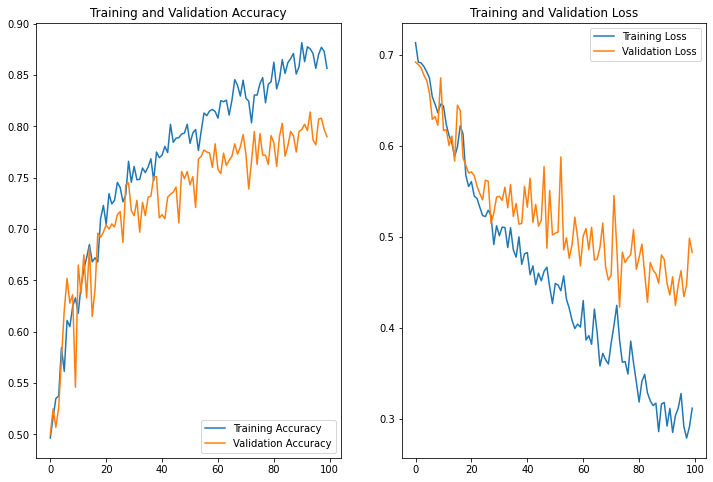

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.savefig('./foo.png')
plt.show()

In [111]:
best_model = keras.models.load_model('./weights-improvement-74-0.80.hdf5')

In [148]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cat05.jpg to cat05.jpg
User uploaded file "cat05.jpg" with length 93599 bytes


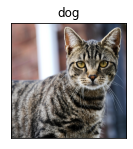

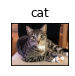

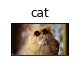

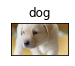

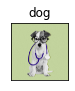

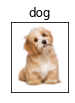

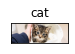

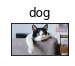

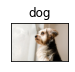

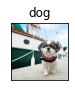

In [166]:
imgs = ['cat01.jpg',  'cat03.jpg' , 'cat05.jpg' ,'dog01.jpg' , 'dog03.jpg' , 'dog.jpg'
 , 'cat04.jpg',  'cat.jpg'	, 'dog02.jpg' , 'dog04.jpg']

plt.figure(figsize=(12,12))
for i,im in enumerate(imgs):
  img = cv2.imread(im)[...,::-1]
  img1 = cv2.resize(img,(150,150))/255.0
  img1 = img1.reshape(1,150,150,3)

  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  
  plt.title(list(['cat','dog'])[int(model.predict(img1)>0.5)])
  plt.show()